# **Librerias**

In [1]:
# Importamos

import jax
import torch
import matplotlib
import jax.numpy as jaxnp
import matplotlib.pyplot as plt

from torch.func import jacrev

# Version 

print(f'JAX Version: {jax.__version__}')
print(f'Pytorch Version: {torch.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

JAX Version: 0.4.34
Pytorch Version: 2.5.0+cpu
Matplotlib Version: 3.9.2


# **Aproximacion Lineal**

**Expansion de Taylor:**

$$f(x + \Delta x) = f(x) + f^{\prime}(x) \cdot \Delta x + \frac{f^{\prime\prime}(x)}{2!} \cdot (\Delta x)^2 + \frac{f^{\prime\prime\prime}(x)}{3!} \cdot (\Delta x)^3 + ...$$

**Aproximacion Lineal:** 

$$df = f(x + \Delta x) - f(x) = f(x) + f^{\prime}(x) \cdot \Delta x - f(x) = f^{\prime}(x) \cdot \Delta x$$

**Sustituimos el diferencial por una diferencia finita $\delta x$ muy pequeña**

$$df = f(x + \delta x) - f(x) = f^{\prime}(x) \cdot \delta x + o(\, \|\delta x\|)$$


**Eliminamos los terminos de Orden Superior $o(\, \|\delta x\|)$**

$$df = f(x + \delta x) - f(x) \approx f^{\prime}(x) \cdot \delta x$$

**Forward Difference:**    $\hspace{1cm}df = f(x + \delta x) - f(x)$

**Backward Difference:**    $\hspace{0.8cm}df = f(x) - f(x + \delta x)$

**Funciones Escalares:** $\hspace{0.95cm}df = (\nabla f)^T \cdot \delta x$

**Funciones Vectoriales:** $\hspace{0.7cm}df = J \cdot \delta x$

### **Visualizacion 2D**

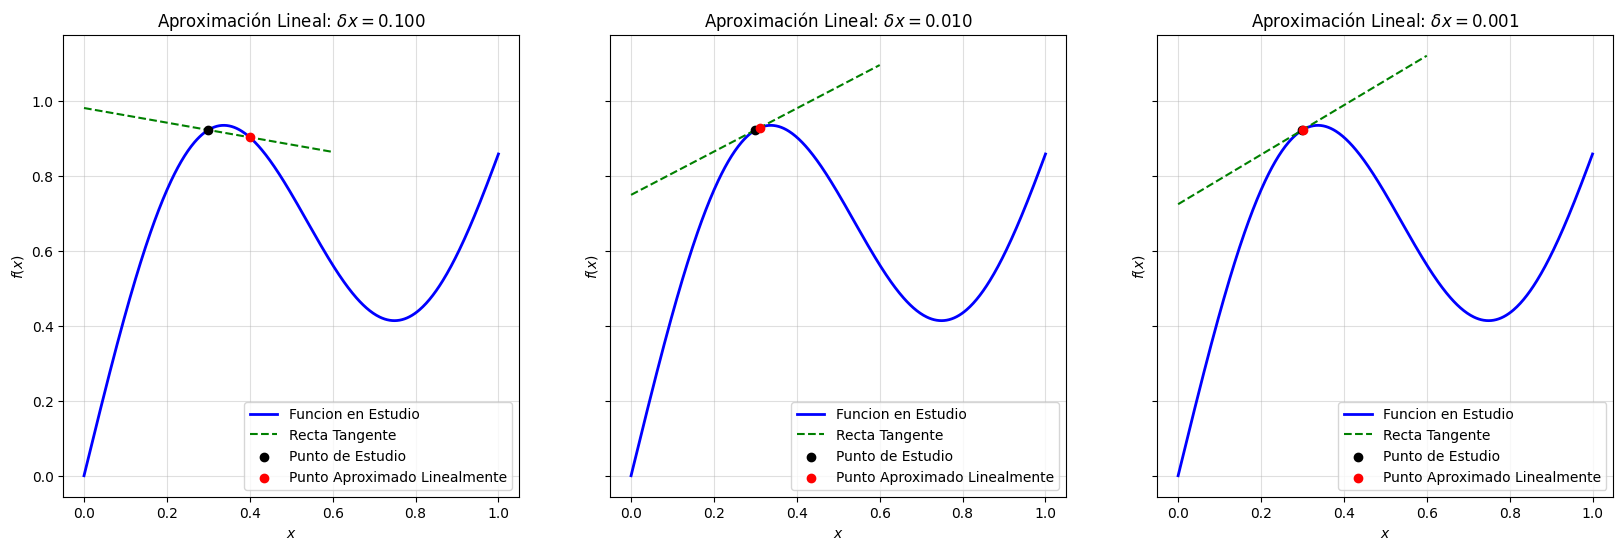

In [2]:
# Definimos la Funcion Escalar 

def scalar_Fn(x_point): 
    
    output = jaxnp.sin(1.5 * x_point) + 0.5 * jaxnp.sin(6 * x_point) 
    
    return output 

# Generamos los Puntos de la Funcion Escalar

x = jaxnp.linspace(start = 0, stop = 1, num = 500) 
y = scalar_Fn(x)

# Definimos la Lista de Diferencias finitas 

delta_x = jaxnp.logspace(start = -1, stop = -3, num = 3)

# Definimos el Punto de Estudio 

x_point = 0.3 

# Calculamos la Aproximacion Lineal para todas las Diferencias Finitas en el Punto de Estudio 

def linear_approx(x_point, delta_x): 
    
    approx = scalar_Fn(x_point + delta_x) - scalar_Fn(x_point)  
    
    return approx

# Definimos los Puntos de la Recta Tangente

tag_line_points = jaxnp.linspace(start = x_point - 0.3, stop = x_point + 0.3, num = 100)

# Calculamos la Recta Tangente al Punto de Estudio

def tag_line(x_point, delta_x, approx, tag_line_points): 
    
    slope = approx / delta_x
    
    line = scalar_Fn(x_point) + slope * (tag_line_points - x_point) 
    
    return line 

# Visualizamos 

fig, axes = plt.subplots(1, 3, figsize = (20, 6), sharex = True, sharey = True)

for idx in range(0, len(delta_x)):
    
    axes[idx].plot(x, y, label = r'Funcion en Estudio', color = 'blue', linewidth = 2)
    axes[idx].plot(tag_line_points, tag_line(x_point, delta_x[idx], linear_approx(x_point, delta_x[idx]), tag_line_points), color = 'green', linestyle = '--', label = 'Recta Tangente', linewidth = 1.5) 
    
    axes[idx].scatter(x_point, scalar_Fn(x_point), color = 'black', label = f'Punto de Estudio', zorder = 5)
    axes[idx].scatter(x_point + delta_x[idx], scalar_Fn(x_point + delta_x[idx]), color = 'red', label = f'Punto Aproximado Linealmente', zorder = 5) 

    axes[idx].set_title(f'Aproximación Lineal: $\delta x = ${delta_x[idx]:.3f}')
    axes[idx].set_xlabel('$x$')
    axes[idx].set_ylabel('$f(x)$')
    axes[idx].legend(loc = 'lower right')                                                                                                                                                                                  
    axes[idx].grid(alpha = 0.4)

plt.show()

### **Visualizacion 3D**

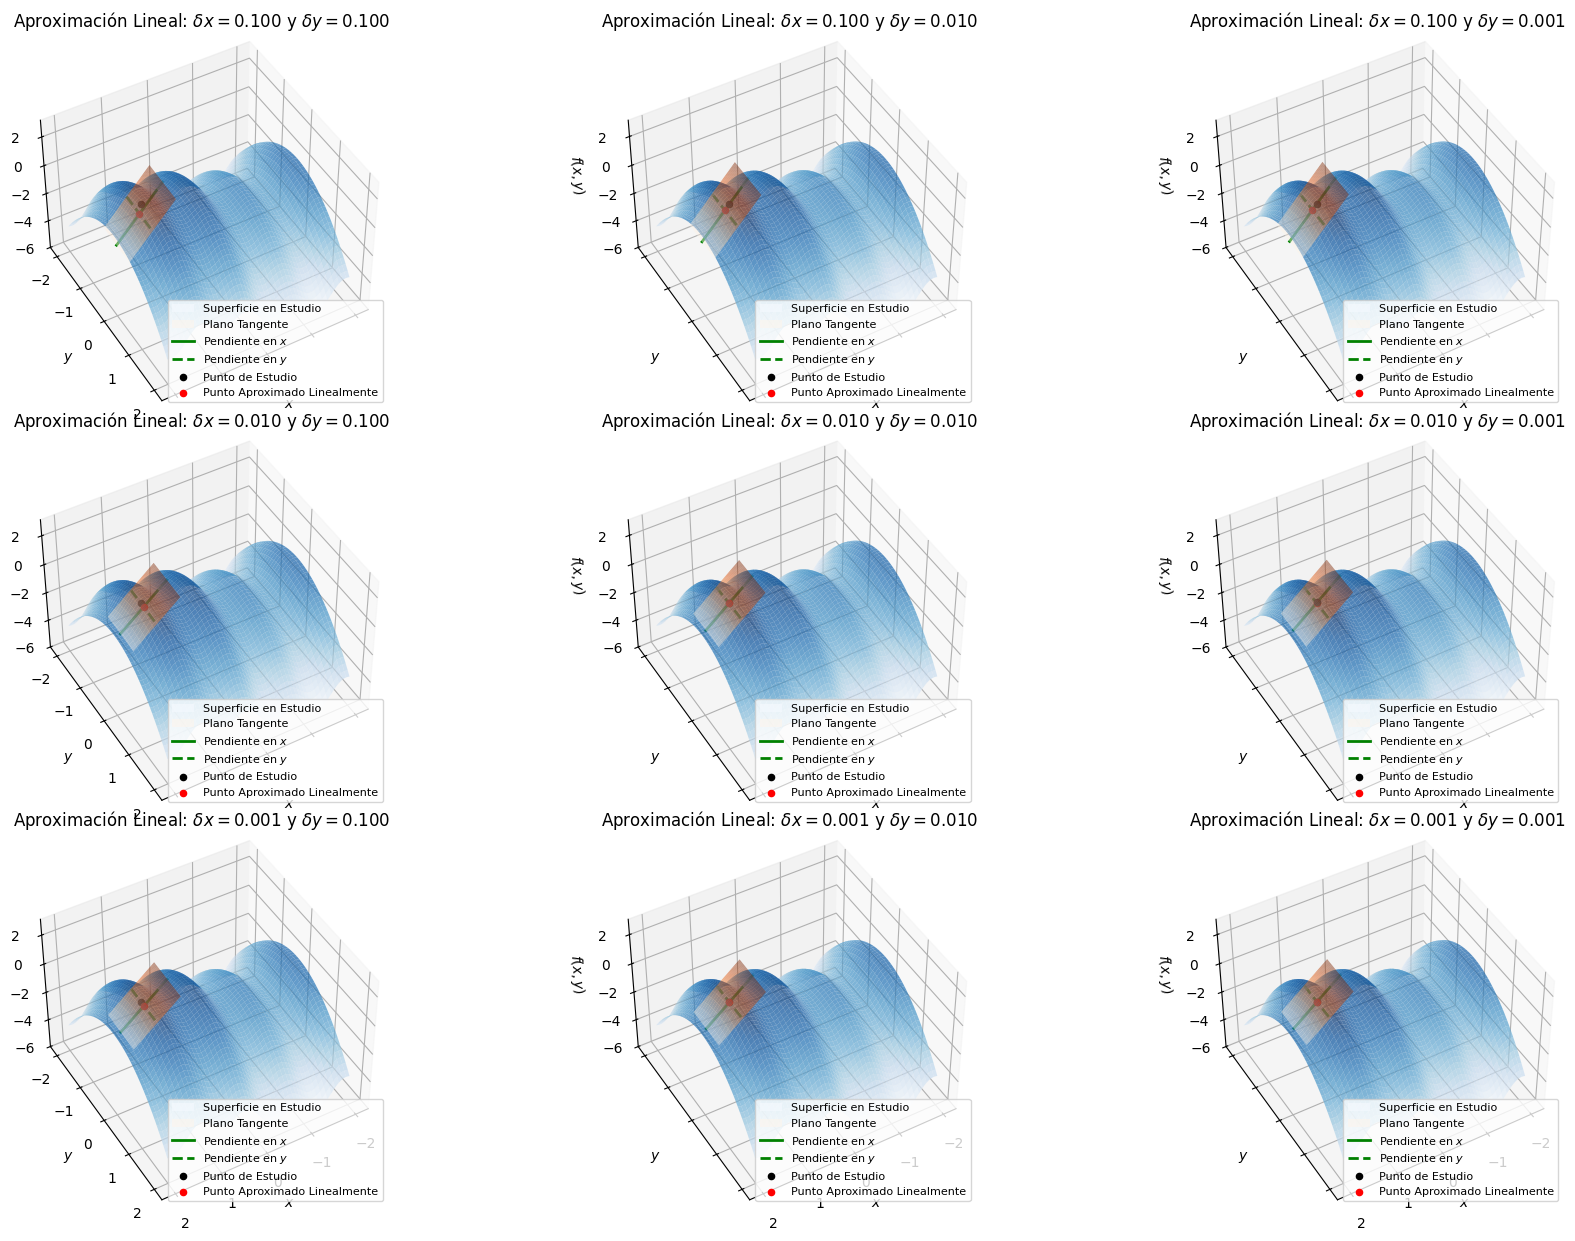

In [3]:
# Definimos la Funcion Vectorial 

def vector_Fn(x_point, y_point): 
    
    output = jaxnp.sin(1.5 * x_point) + 0.5 * jaxnp.sin(6 * x_point) - y_point**2
    
    return output 

# Generamos los Puntos de la Funcion Vectorial

x_surf = jaxnp.linspace(start = -2, stop = 2, num = 500) 
y_surf = jaxnp.linspace(start = -2, stop = 2, num = 500)

X_surf, Y_surf = jaxnp.meshgrid(x_surf, y_surf)

z_surf = vector_Fn(X_surf, Y_surf) 

# Definimos la Lista de Diferencias finitas en las dos direcciones

delta_x = jaxnp.logspace(start = -1, stop = -3, num = 3)
delta_y = jaxnp.logspace(start = -1, stop = -3, num = 3)

# Definimos las Coordenadas del Punto de Estudio

x_point = 1.4
y_point = 0

# Calculamos la Aproximacion Lineal para todas las Diferencias Finitas en los Puntos de Estudio 

def linear_approx(x_point, y_point, delta_x, delta_y): 
    
    approx_x = vector_Fn(x_point + delta_x, y_point) - vector_Fn(x_point, y_point)  
    approx_y = vector_Fn(x_point, y_point + delta_y) - vector_Fn(x_point, y_point)  
    
    return approx_x, approx_y

# Calculamos El Plano Tangente al Punto Aproximado Linealmente

def tag_plane(x_point, y_point, delta_x, delta_y, approx_x, approx_y, x_plane, y_plane): 
    
    slope_x = approx_x / delta_x
    slope_y = approx_y / delta_y
       
    plane = vector_Fn(x_point + delta_x, y_point + delta_y) + (slope_x * (x_plane - (x_point + delta_x))) + (slope_y * (y_plane - (y_point + delta_y)))
    
    return plane 

# Visualizamos 

fig, axes = plt.subplots(3, 3, figsize = (20, 12), sharex = True, sharey = True, subplot_kw = {'projection': '3d'})

for idx in range(0, len(delta_x)):
    for idy in range(0, len(delta_y)):
              
        approx_x, approx_y = linear_approx(x_point, y_point, delta_x[idx], delta_y[idy]) 
                  
        x_plane = jaxnp.linspace(start = (x_point + delta_x[idx]) - 0.5, stop = (x_point + delta_x[idx]) + 0.5, num = 100)
        y_plane = jaxnp.linspace(start = (y_point + delta_y[idy]) - 0.5, stop = (y_point + delta_y[idy]) + 0.5, num = 100)

        X_plane, Y_plane = jaxnp.meshgrid(x_plane, y_plane)
        
        Z_plane = tag_plane(x_point, y_point, delta_x[idx], delta_y[idy], approx_x, approx_y, X_plane, Y_plane)  
        
        line_x = jaxnp.linspace(start = (x_point + delta_x[idx]) - 0.5, stop = (x_point + delta_x[idx]) + 0.5, num = 10)        
        line_x_y = jaxnp.full_like(line_x, y_point + delta_y[idy])
        line_x_z = vector_Fn(x_point + delta_x[idx], y_point + delta_y[idy]) + (approx_x / delta_x[idx])  * (line_x - (x_point + delta_x[idx]))
        
        line_y = jaxnp.linspace(start = (y_point + delta_y[idy]) - 0.5, stop = (y_point + delta_y[idy]) + 0.5, num = 10)        
        line_y_x = jaxnp.full_like(line_y, x_point + delta_x[idx])  # Fija el valor de x
        line_y_z = vector_Fn(x_point + delta_x[idx], y_point + delta_y[idy]) + (approx_y / delta_y[idy]) * (line_y - (y_point + delta_y[idy]))        
    
        axes[idx][idy].plot_surface(X_surf, Y_surf, z_surf, cmap = 'Blues', alpha = 0.7, label = "Superficie en Estudio")
        axes[idx][idy].plot_surface(X_plane, Y_plane, Z_plane, cmap = 'Oranges', alpha = 0.5, label = "Plano Tangente")
        
        axes[idx][idy].plot(line_x, line_x_y, line_x_z, color = 'Green', lw = 2, label = 'Pendiente en $x$')
        axes[idx][idy].plot(line_y_x, line_y, line_y_z, color = 'Green', lw = 2, linestyle = 'dashed', label = 'Pendiente en $y$')

        axes[idx][idy].scatter(x_point, y_point, vector_Fn(x_point, y_point), color = 'black', label = f'Punto de Estudio', zorder = 5)
        axes[idx][idy].scatter(x_point + delta_x[idx], y_point + delta_y[idy], vector_Fn(x_point + delta_x[idx], y_point + delta_y[idy]), color = 'red', label = f'Punto Aproximado Linealmente', zorder = 5) 

        axes[idx][idy].set_xlabel('$x$')
        axes[idx][idy].set_ylabel('$y$')
        axes[idx][idy].set_zlabel('$f(x, y)$')
        axes[idx][idy].set_title(f'Aproximación Lineal: $\delta x = ${delta_x[idx]:.3f} y $\delta y = ${delta_y[idy]:.3f}')

        axes[idx][idy].legend(loc = 'lower right', fontsize = 8)                                                                                                                                                                                  
        axes[idx][idy].grid(alpha = 0.2, fontsize = 8)  
        
        axes[idx][idy].view_init(azim = 60, elev = 45)        
          
plt.subplots_adjust(hspace = 1)
plt.tight_layout(pad = 0.1)
plt.show()

### **Ejercicio #1**

**Funcion:**

$$F(X) = X^2$$

**Artificios:** 

$$X^2 = XX$$
$$vec(ABC) = (C^T \otimes A) \cdot vec(B)$$

**Derivada:**

$$d(X^2) = X dX + dX  X$$
$$d(X^2) = X  dX  I + I  dX  X$$
$$d(X^2) = vec(XdXI) + vec(IdXX)$$
$$d(X^2) = (I \otimes X) \cdot vec(dX) + (X^T \otimes I) \cdot vec(dX)$$
$$d(X^2) = (I \otimes X + X^T \otimes I) \cdot vec(dX)$$

**Jacobiana:** 

$$J = I \otimes X + X^T \otimes I$$

In [4]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Vectorial 

def Fn(x): 
    
    output = torch.matmul(x, x)
    
    return output

# Definimos la Matriz Derivable 

X = torch.randn(size = (4, 4), dtype = torch.float64)

# Definimos el Diferencial Finito 

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[ 0.2996,  0.2424,  0.2832, -0.2329],
        [ 0.6712,  0.7818, -1.7903, -1.7484],
        [ 0.1735,  0.2668,  0.4285,  0.2319],
        [-1.0215, -0.8273,  1.7342, -1.4921]], dtype=torch.float64)

Diferencial Finito: 
tensor([[ 4.2120e-09,  1.5046e-08,  1.2716e-08,  6.1867e-09],
        [-3.7203e-10,  1.0352e-08, -1.0086e-10,  8.9480e-10],
        [ 8.4030e-10,  3.9000e-09, -5.7984e-09,  8.7589e-09],
        [ 3.9238e-09,  1.1085e-08,  8.6517e-09,  8.5522e-09]],
       dtype=torch.float64)


In [5]:
# Calculamos la Derivada Exacta 

exact = torch.matmul(X, dX) + torch.matmul(dX, X)

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
tensor([[ 7.7417e-09,  1.6597e-08, -9.4384e-09, -3.1011e-08],
        [ 7.6351e-11, -9.3551e-10, -1.3421e-08, -4.5154e-08],
        [-5.1822e-09,  4.0734e-09,  7.6612e-09, -1.4380e-08],
        [-7.0119e-09, -2.8858e-08, -3.6065e-08, -3.5679e-08]],
       dtype=torch.float64)


In [6]:
# Calculamos la Derivada con la Aproximacion Lineal

linear_approx = Fn(x = X + dX) - Fn(x = X) 

# Visualizamos 

print(f'Error: {torch.norm(linear_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Lineal: \n{linear_approx}')

Error: 1.3487274384909261e-08

Derivada Vectorial con Aproximacion Lineal: 
tensor([[ 7.7417e-09,  1.6597e-08, -9.4384e-09, -3.1011e-08],
        [ 7.6351e-11, -9.3551e-10, -1.3421e-08, -4.5154e-08],
        [-5.1822e-09,  4.0734e-09,  7.6612e-09, -1.4380e-08],
        [-7.0119e-09, -2.8858e-08, -3.6065e-08, -3.5679e-08]],
       dtype=torch.float64)


In [7]:
# Calculamos la Matriz Jacobiana (Indicamos con respecto a que argumento derivamos en nuestro caso el primer argumento 0 --> X) (backward-mode)

jacobian = jacrev(Fn, argnums = 0)(X)

# Redimensionamos

new_shape = (jacobian.shape[0] * jacobian.shape[1], jacobian.shape[2] * jacobian.shape[3])

jacobian = jacobian.reshape(new_shape)

# Vectorizamos el Diferencial 

dX_vec = dX.view(-1, 1)

# Calculamos la Derivada con Vectorizacion y Redimensionamos

vec = torch.matmul(jacobian, dX_vec).reshape(exact.shape)

# Visualizamos 

print(f'Error: {torch.norm(vec - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{vec}')

Error: 1.34544435771103e-16

Derivada Vectorial con Vectorizacion: 
tensor([[ 7.7417e-09,  1.6597e-08, -9.4384e-09, -3.1011e-08],
        [ 7.6351e-11, -9.3551e-10, -1.3421e-08, -4.5154e-08],
        [-5.1822e-09,  4.0734e-09,  7.6612e-09, -1.4380e-08],
        [-7.0119e-09, -2.8858e-08, -3.6065e-08, -3.5679e-08]],
       dtype=torch.float64)


### **Ejercicio #2**

**Funcion:**

$$F(X) = XAX^TB$$

**Artificios:** 

$$vec(ABC) = (C^T \otimes A) \cdot vec(B)$$
$$vec(dX^T) = K_{m, n} \cdot vec(dX)$$

**Derivada:**

$$d(XAX^TB) = XAX^TdB + XAdX^TB + XdAX^TB + dXAX^TB$$
$$d(XAX^TB) = XAdX^TB + dXAX^TB$$
$$d(XAX^TB) = vec(XAdX^TB) + vec(dXAX^TB)$$
$$d(XAX^TB) = (B^T \otimes XA) \cdot vec(dX^T) + ((AX^TB)^T \otimes I) \cdot vec(dX)$$
$$d(XAX^TB) = (B^T \otimes XA) \cdot K_{m, n} \cdot vec(dX) + ((AX^TB)^T \otimes I) \cdot vec(dX)$$
$$d(XAX^TB) = ((B^T \otimes XA) \cdot K_{m, n} +  ((AX^TB)^T \otimes I))\cdot vec(dX)$$

**Jacobiana:** 

$$J = (B^T \otimes XA) \cdot K_{m, n} +  (AX^TB)^T \otimes I$$

In [8]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Vectorial 

def Fn(A, X, B):   
    
    output = torch.matmul(X, A)
    output = torch.matmul(output, X.T)
    output = torch.matmul(output, B)
    
    return output

# Definimos las Matrices Derivables 

X = torch.tensor([[1.0, 2.0], [3.0, 4.0], [9.0, 5.0]], dtype = torch.float64) 
A = torch.tensor([[8.0, 9.0], [5.0, 7.0]], dtype = torch.float64) 
B = torch.tensor([[8.0, 9.0, 6.0], [5.0, 7.0, 1.0], [7.0, 6.0, 4.0]], dtype = torch.float64)

# Definimos el Diferencial Finito 

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2.],
        [3., 4.],
        [9., 5.]], dtype=torch.float64)

Diferencial Finito: 
tensor([[ 3.3669e-09,  1.2881e-09],
        [ 2.3446e-09,  2.3033e-09],
        [-1.1229e-08, -1.8633e-09]], dtype=torch.float64)


In [9]:
# Calculamos la Derivada Exacta 

exact = torch.matmul(torch.matmul(torch.matmul(X, A), dX.T), B) + torch.matmul(torch.matmul(torch.matmul(dX, A), X.T), B)

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
tensor([[ 5.1449e-06,  5.8003e-06,  2.5741e-06],
        [ 3.9719e-06,  5.3727e-06,  1.8600e-06],
        [-1.9484e-05, -1.7085e-05, -1.0440e-05]], dtype=torch.float64)


In [10]:
# Calculamos la Derivada con la Aproximacion Lineal

linear_approx = Fn(A, X + dX, B) - Fn(A, X, B) 

# Visualizamos 

print(f'Error: {torch.norm(linear_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Lineal: \n{linear_approx}')

Error: 1.2158095343014149e-07

Derivada Vectorial con Aproximacion Lineal: 
tensor([[ 5.1449e-06,  5.8003e-06,  2.5741e-06],
        [ 3.9719e-06,  5.3727e-06,  1.8600e-06],
        [-1.9484e-05, -1.7085e-05, -1.0440e-05]], dtype=torch.float64)


In [11]:
# Calculamos la Matriz Jacobiana (Indicamos con respecto a que argumento derivamos en nuestro caso el primer argumento 1 --> X) (backward-mode)

jacobian = jacrev(Fn, argnums = 1)(A, X, B)

# Redimensionamos

new_shape = (jacobian.shape[0] * jacobian.shape[1], jacobian.shape[2] * jacobian.shape[3])

jacobian = jacobian.reshape(new_shape)

# Vectorizamos el Diferencial 

dX_vec = dX.view(-1, 1)

# Calculamos la Derivada con Vectorizacion y Redimensionamos

vec = torch.matmul(jacobian, dX_vec).reshape(exact.shape)

# Visualizamos 

print(f'Error: {torch.norm(vec - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{vec}')

Error: 1.680678296797939e-16

Derivada Vectorial con Vectorizacion: 
tensor([[ 5.1449e-06,  5.8003e-06,  2.5741e-06],
        [ 3.9719e-06,  5.3727e-06,  1.8600e-06],
        [-1.9484e-05, -1.7085e-05, -1.0440e-05]], dtype=torch.float64)


### **Ejercicio #3**

**Funcion:**

$$F(X) = X^{-1}$$

**Artificios:** 

$$vec(ABC) = (C^T \otimes A) \cdot vec(B)$$

$$I = XX^{-1}$$
$$dI = XdX^{-1} + dXX^{-1}$$
$$0 = XdX^{-1} + dXX^{-1}$$
$$XdX^{-1} = - (dXX^{-1})$$
$$X^{-1}XdX^{-1} = - (X^{-1}dXX^{-1})$$
$$dX^{-1} = - (X^{-1}dXX^{-1})$$

**Derivada:**

$$d(X^{-1}) = dX^{-1}$$
$$d(X^{-1}) = - (X^{-1}dXX^{-1})$$
$$d(X^{-1}) = - vec(X^{-1}dXX^{-1})$$
$$d(X^{-1}) = ((X^{-1})^T \otimes X^{-1}) \cdot vec(dX)$$

**Jacobiana:** 

$$J = (X^{-1})^T \otimes X^{-1}$$

In [12]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Vectorial 

def Fn(X):   
    
    output = torch.linalg.inv(X)
    
    return output

# Definimos la Matriz Derivable

X = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtype = torch.float64) 

# Definimos el Diferencial Finito 

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

Diferencial Finito: 
tensor([[3.3669e-09, 1.2881e-09],
        [2.3446e-09, 2.3033e-09]], dtype=torch.float64)


In [13]:
# Calculamos la Derivada Exacta 

exact = -torch.matmul(torch.matmul(torch.linalg.inv(X), dX), torch.linalg.inv(X))

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
tensor([[-8.3691e-09,  4.2528e-09],
        [ 6.5854e-09, -3.4878e-09]], dtype=torch.float64)


In [14]:
# Calculamos la Derivada con la Aproximacion Lineal

linear_approx = Fn(X + dX) - Fn(X) 

# Visualizamos 

print(f'Error: {torch.norm(linear_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Lineal: \n{linear_approx}')

Error: 1.0322700573801797e-08

Derivada Vectorial con Aproximacion Lineal: 
tensor([[-8.3691e-09,  4.2528e-09],
        [ 6.5854e-09, -3.4878e-09]], dtype=torch.float64)


In [15]:
# Calculamos la Matriz Jacobiana (Indicamos con respecto a que argumento derivamos en nuestro caso el primer argumento 0 --> X) (backward-mode)

jacobian = jacrev(Fn, argnums = 0)(X)

# Redimensionamos

new_shape = (jacobian.shape[0] * jacobian.shape[1], jacobian.shape[2] * jacobian.shape[3])

jacobian = jacobian.reshape(new_shape)

# Vectorizamos el Diferencial 

dX_vec = dX.view(-1, 1)

# Calculamos la Derivada con Vectorizacion y Redimensionamos

vec = torch.matmul(jacobian, dX_vec).reshape(exact.shape)

# Visualizamos 

print(f'Error: {torch.norm(vec - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{vec}')

Error: 0.0

Derivada Vectorial con Vectorizacion: 
tensor([[-8.3691e-09,  4.2528e-09],
        [ 6.5854e-09, -3.4878e-09]], dtype=torch.float64)


### **Ejercicio #4**

**Funcion:**

$$F(X) = \text{Tr}(XA)$$

**Concepto Clave:** 

$$f'(X) = (\nabla X)^T$$
$$\nabla X = f'(X)^T$$

**Artificios:** 

$$d(\text{Tr}(X)) = \text{Tr}(d(X))$$
$$\text{Tr}(AB) = \text{Tr}(BA)$$

**Derivada:**

$$F(X) = \text{Tr}(AX)$$
$$df(X) = \text{Tr}(d(AX))$$
$$df(X) = \text{Tr}(AdX + dAX)$$
$$df(X) = \text{Tr}(AdX)$$

**Gradiente:** 

$$(\nabla X)^T = A$$
$$\nabla X = A^T$$

In [16]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Escalar 

def Fn(A, X):   
    
    output = torch.trace(torch.matmul(A, X))
    
    return output

# Definimos las Matrices Derivables 

X = torch.tensor([[1.0, 2.0, 7.0], [3.0, 4.0, 9.0]], requires_grad = True, dtype = torch.float64)
A = torch.tensor([[2.0, 8.0], [6.0, 1.0], [4.0, 3.0]], requires_grad = False, dtype = torch.float64)

# Definimos el Diferencial Finito 

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2., 7.],
        [3., 4., 9.]], dtype=torch.float64, requires_grad=True)

Diferencial Finito: 
tensor([[ 3.3669e-09,  1.2881e-09,  2.3446e-09],
        [ 2.3033e-09, -1.1229e-08, -1.8633e-09]], dtype=torch.float64)


In [17]:
# Calculamos la Derivada Exacta 

exact = torch.trace(torch.matmul(A, dX))

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
2.544909541736784e-08


In [18]:
# Calculamos la Derivada con la Aproximacion Lineal

linear_approx = Fn(A, X + dX) - Fn(A, X) 

# Visualizamos 

print(f'Error: {torch.norm(linear_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Lineal: \n{linear_approx}')

Error: 6.226319396530075e-07

Derivada Vectorial con Aproximacion Lineal: 
2.5449111262787483e-08


In [19]:
# Calculamos los Gradientes

Fn(A, X).backward()

# Obtenemos los Gradientes respecto a la Variable y Trasponemos

gradients = X.grad.T

# Calculamos la Derivada

derivate = torch.trace(torch.matmul(gradients, dX))

# Visualizamos 

print(f'Error: {torch.norm(derivate - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{derivate}')

Error: 0.0

Derivada Vectorial con Vectorizacion: 
2.544909541736784e-08


### **Ejercicio #5**

**Funcion:**

$$F(X) = \text{Tr}(AXBX^TC)$$

**Concepto Clave:** 

$$f'(X) = (\nabla X)^T$$
$$\nabla X = f'(X)^T$$

**Artificios:** 

$$d(\text{Tr}(X)) = \text{Tr}(d(X))$$
$$\text{Tr}(ABC) = \text{Tr}(CAB) = \text{Tr}(BCA)$$
$$\text{Tr}(A + B) = \text{Tr}(A) + \text{Tr}(B)$$

**Derivada:**

$$df(X) = \text{Tr}(d(AXBX^TC))$$
$$df(X) = \text{Tr}(AXBX^TdC + AXBdX^TC + AXdBX^TC + AdXBX^TC + dAXBX^TC)$$
$$df(X) = \text{Tr}(AXBdX^TC + AdXBX^TC)$$
$$df(X) = \text{Tr}(AXBdX^TC) +  \text{Tr}(AdXBX^TC)$$
$$df(X) = \text{Tr}(dX^TCAXB) +  \text{Tr}(BX^TCAdX)$$
$$df(X) = \text{Tr}(dX^TCAXB) +  \text{Tr}(BX^TCAdX)$$
$$df(X) = \text{Tr}(B^TX^TA^TC^TdX) +  \text{Tr}(BX^TCAdX)$$
**Gradiente:** 

$$(\nabla X)^T = B^TX^TA^TC^T + BX^TCA$$
$$\nabla X = CAXB + A^TC^TXB^T$$

In [20]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Escalar 

def Fn(A, X, B, C):   
    
    output = torch.trace(torch.matmul(torch.matmul(torch.matmul(torch.matmul(A, X), B), X.T), C))
    
    return output

# Definimos las Matrices Derivables 

X = torch.tensor([[1.0, 2.0, 7.0, 5.0], [3.0, 4.0, 9.0, 1.0], [5.0, 4.0, 1.0, 3.0]], requires_grad = True, dtype = torch.float64)
A = torch.tensor([[5.0, 2.0, 5.0], [1.0, 7.0, 2.0]], requires_grad = False, dtype = torch.float64)
B = torch.tensor([[5.0, 2.0, 5.0, 9.0], [1.0, 7.0, 2.0, 9.0], [5.0, 1.0, 1.0, 9.0], [5.0, 1.0, 1.0, 9.0]], requires_grad = False, dtype = torch.float64)
C = torch.tensor([[5.0, 4.0], [2.0, 2.0], [8.0, 5.0]], requires_grad = False, dtype = torch.float64)

# Definimos el Diferencial Finito 

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2., 7., 5.],
        [3., 4., 9., 1.],
        [5., 4., 1., 3.]], dtype=torch.float64, requires_grad=True)

Diferencial Finito: 
tensor([[ 3.3669e-09,  1.2881e-09,  2.3446e-09,  2.3033e-09],
        [-1.1229e-08, -1.8633e-09,  2.2082e-08, -6.3800e-09],
        [ 4.6166e-09,  2.6735e-09,  5.3490e-09,  8.0936e-09]],
       dtype=torch.float64)


In [21]:
# Calculamos la Derivada Exacta 

exact = torch.trace(torch.matmul(torch.matmul(torch.matmul(torch.matmul(B.T, X.T), A.T), C.T), dX)) + torch.trace(torch.matmul(torch.matmul(torch.matmul(torch.matmul(B, X.T), C), A), dX))

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
0.0004225893478700467


In [22]:
# Calculamos la Derivada con la Aproximacion Lineal

linear_approx = Fn(A, X + dX, B, C) - Fn(A, X, B, C) 

# Visualizamos 

print(f'Error: {torch.norm(linear_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Lineal: \n{linear_approx}')

Error: 3.926164767074149e-08

Derivada Vectorial con Aproximacion Lineal: 
0.0004225893644616008


In [23]:
# Calculamos los Gradientes

Fn(A, X, B, C).backward()

# Obtenemos los Gradientes respecto a la Variable y Trasponemos

gradients = X.grad.T

# Calculamos la Derivada

derivate = torch.trace(torch.matmul(gradients, dX))

# Visualizamos 

print(f'Error: {torch.norm(derivate - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{derivate}')

Error: 1.2828082131626692e-16

Derivada Vectorial con Vectorizacion: 
0.00042258934787004675


### **Ejercicio #6**

**Funcion:**

$$F(X) = ||X||_F$$

**Concepto Clave:** 

$$f'(X) = (\nabla X)^T$$
$$\nabla X = f'(X)^T$$

**Artificios:** 

$$\, \|X\|_F^2 = \text{Tr}(X X^T)$$
$$d(\text{Tr}(X)) = \text{Tr}(d(X))$$
$$\text{Tr}(ABC) = \text{Tr}(CAB) = \text{Tr}(BCA)$$
$$\text{Tr}(A + B) = \text{Tr}(A) + \text{Tr}(B)$$

**Derivada:**

$$df(X) = \sqrt{\text{Tr}(X X^T)}$$
$$df(X) = \frac{1}{2 \sqrt{\text{Tr}(X X^T)}} \cdot d(\text{Tr}(X X^T))$$
$$df(X) = \frac{1}{2 ||X||_F} \cdot \text{Tr}(X dX^T + dX X^T)$$
$$df(X) = \frac{1}{2 ||X||_F} \cdot \text{Tr}(dX X^T + dX X^T)$$
$$df(X) = \frac{1}{2 ||X||_F} \cdot \text{Tr}(dX X^T) +  \text{Tr}(dX X^T)$$
$$df(X) = \frac{1}{2 ||X||_F} \cdot \text{Tr}(X^T dX) +  \text{Tr}(X^T dX)$$
$$df(X) = \frac{1}{2 ||X||_F} \cdot 2 \cdot \text{Tr}(X^T dX)$$
$$df(X) = \frac{1}{||X||_F} \cdot \text{Tr}(X^T dX)$$

**Gradiente:** 

$$(\nabla X)^T = \frac{X^T}{||X||_F} $$
$$\nabla X = \frac{X}{||X||_F}$$

In [24]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Escalar 

def Fn(X):   
    
    output = torch.norm(X)
    
    return output

# Definimos la Matriz Derivable 

X = torch.tensor([[1.0, 2.0, 6.0], [3.0, 4.0, 7.0], [5.0, 3.0, 8.0]], requires_grad = True, dtype = torch.float64)

# Definimos el Diferencial Finito 

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2., 6.],
        [3., 4., 7.],
        [5., 3., 8.]], dtype=torch.float64, requires_grad=True)

Diferencial Finito: 
tensor([[ 3.3669e-09,  1.2881e-09,  2.3446e-09],
        [ 2.3033e-09, -1.1229e-08, -1.8633e-09],
        [ 2.2082e-08, -6.3800e-09,  4.6166e-09]], dtype=torch.float64)


In [25]:
# Calculamos la Derivada Exacta 

exact = (1 / torch.norm(X)) * torch.trace(torch.matmul(X.T, dX))

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
6.65772661745221e-09


In [26]:
# Calculamos la Derivada con la Aproximacion Lineal

linear_approx = Fn(X + dX) - Fn(X) 

# Visualizamos 

print(f'Error: {torch.norm(linear_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Lineal: \n{linear_approx}')

Error: 2.9637760470664163e-07

Derivada Vectorial con Aproximacion Lineal: 
6.657728590653278e-09


In [27]:
# Calculamos los Gradientes

Fn(X).backward()

# Obtenemos los Gradientes respecto a la Variable y Trasponemos

gradients = X.grad.T

# Calculamos la Derivada

derivate = torch.trace(torch.matmul(gradients, dX))

# Visualizamos 

print(f'Error: {torch.norm(derivate - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{derivate}')

Error: 2.4848740721335733e-16

Derivada Vectorial con Vectorizacion: 
6.657726617452209e-09


### **Ejercicio #7**

**Funcion:**

$$F(X) = \det(X)$$

**Concepto Clave:** 

$$f'(X) = (\nabla X)^T$$
$$\nabla X = f'(X)^T$$

**Artificios:** 

$$\det(X) = e^{\text{Tr}(\ln(X))}$$
$$d(\text{Tr}(X)) = \text{Tr}(d(X))$$

**Derivada:**

$$df(X) = e^{\text{Tr}(\ln(X))}$$
$$df(X) = e^{\text{Tr}(\ln(X))} \cdot \text{Tr}(d\ln(X))$$
$$df(X) = e^{\text{Tr}(\ln(X))} \cdot \text{Tr}(\frac{1}{X} \cdot dX)$$
$$df(X) = e^{\text{Tr}(\ln(X))} \cdot \text{Tr}(X^{-1} dX)$$
$$df(X) = \det(X) \cdot \text{Tr}(X^{-1} dX)$$

**Gradiente:** 

$$(\nabla X)^T = \det(X) \cdot X^{-1} $$
$$\nabla X = \det(X) \cdot (X^{-1})^T$$

In [28]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Escalar 

def Fn(X):   
    
    output = torch.det(X)
    
    return output

# Definimos la Matriz Derivable 

X = torch.tensor([[1.0, 2.0, 6.0], [3.0, 4.0, 7.0], [5.0, 3.0, 8.0]], requires_grad = True, dtype = torch.float64)

# Definimos el Diferencial Finito 

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2., 6.],
        [3., 4., 7.],
        [5., 3., 8.]], dtype=torch.float64, requires_grad=True)

Diferencial Finito: 
tensor([[ 3.3669e-09,  1.2881e-09,  2.3446e-09],
        [ 2.3033e-09, -1.1229e-08, -1.8633e-09],
        [ 2.2082e-08, -6.3800e-09,  4.6166e-09]], dtype=torch.float64)


In [29]:
# Calculamos la Derivada Exacta 

exact = torch.det(X) * torch.trace(torch.matmul(torch.linalg.inv(X), dX))

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
-3.62267581682225e-08


In [30]:
# Calculamos la Derivada con la Aproximacion Lineal

linear_approx = Fn(X + dX) - Fn(X) 

# Visualizamos 

print(f'Error: {torch.norm(linear_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Lineal: \n{linear_approx}')

Error: 8.65917872157969e-09

Derivada Vectorial con Aproximacion Lineal: 
-3.622675848191648e-08


In [31]:
# Calculamos los Gradientes

Fn(X).backward()

# Obtenemos los Gradientes respecto a la Variable y Trasponemos

gradients = X.grad.T

# Calculamos la Derivada

derivate = torch.trace(torch.matmul(gradients, dX))

# Visualizamos 

print(f'Error: {torch.norm(derivate - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{derivate}')

Error: 7.306692881207275e-16

Derivada Vectorial con Vectorizacion: 
-3.622675816822253e-08


# **Diferencias Finitas**

$$F(X) = X^2$$

In [32]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Vectorial 

def Fn(x): 
    
    output = torch.matmul(x, x)
    
    return output

# Definimos la Matriz Derivable 

X = torch.randn(size = (4, 4), dtype = torch.float64)

# Definimos el Diferencial Finito 

dX = torch.randn(size = X.shape, dtype = torch.float64)

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[ 0.2996,  0.2424,  0.2832, -0.2329],
        [ 0.6712,  0.7818, -1.7903, -1.7484],
        [ 0.1735,  0.2668,  0.4285,  0.2319],
        [-1.0215, -0.8273,  1.7342, -1.4921]], dtype=torch.float64)

Diferencial Finito: 
tensor([[ 0.4212,  1.5046,  1.2716,  0.6187],
        [-0.0372,  1.0352, -0.0101,  0.0895],
        [ 0.0840,  0.3900, -0.5798,  0.8759],
        [ 0.3924,  1.1085,  0.8652,  0.8552]], dtype=torch.float64)


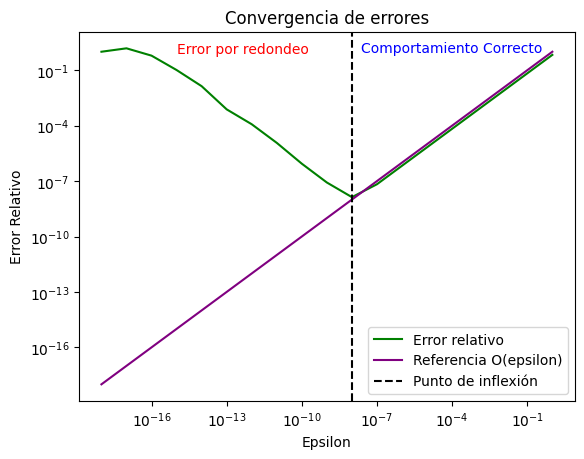

In [33]:
# Definimos la Lista de Epsilons

epsilons = torch.logspace(start = 0, end = -18, steps = 19, dtype = torch.float64)

# Calculamos las Derivadas Exactas para distintos epsilons

exacts = [torch.matmul(X, (epsilon * dX)) + torch.matmul((epsilon * dX), X) for epsilon in epsilons]

# Calculamos las Derivadas con Aproximacion Lineal para distintos epsilons 

linear_approxs = [Fn(x = X + (dX * epsilon)) - Fn(x = X) for epsilon in epsilons]

# Calculamos los Errores 

errors = [torch.norm(linear_approx - exact) / torch.norm(exact) for linear_approx, exact in zip(linear_approxs, exacts)]

# Transformamos los Datos

errors = jaxnp.array([error.item() for error in errors])

# Visualizamos 

inflection_index = jaxnp.argmin(errors)
inflection_epsilon = epsilons.tolist()[inflection_index]

plt.loglog(epsilons, errors, label = "Error relativo", color = "Green")
plt.loglog(epsilons, epsilons, label = "Referencia O(epsilon)", color = "Purple")

plt.axvline(x = inflection_epsilon, color = "black", linestyle = "--", label = "Punto de inflexión")

plt.text(epsilons[-4], errors[0] * 1.2, "Error por redondeo", horizontalalignment = 'left', fontsize = 10, color = "red")
plt.text(epsilons[3] * 0.1, errors[-1], "Comportamiento Correcto", horizontalalignment = 'center', fontsize = 10, color = "blue")

plt.xlabel("Epsilon")
plt.ylabel("Error Relativo")
plt.legend()
plt.title("Convergencia de errores")

plt.show()